# Step 1: Data extraction

## - Setup (Import libraries)

In [7]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


## - Read the webpage and parse it with BeautifulSoup

In [8]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


## - Extract raw data from the wikipedia website

In [9]:
url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})

raw_data = []
for tr in table.find_all("tr"):
    raw_data.append(tr.text)
raw_data = raw_data[2:]
print (raw_data)

['\nAnderson\n\n7,336\n\n3,624\n\n10,960\n\n256\n\n24,776\n\n59,025\n\n18,568.4\n', '\nAndrews\n\n3,733\n\n1,357\n\n5,090\n\n74\n\n8,366\n\n19,279\n\n26,401.8\n', '\nAngelina\n\n9,891\n\n7,183\n\n17,074\n\n503\n\n40,498\n\n90,989\n\n18,764.9\n', '\nAransas\n\n4,131\n\n1,415\n\n5,546\n\n98\n\n14,327\n\n23,710\n\n23,391.0\n', '\nArcher\n\n2,310\n\n332\n\n2,642\n\n30\n\n4,235\n\n9,228\n\n28,630.3\n', '\nArmstrong\n\n442\n\n252\n\n694\n\n10\n\n727\n\n2,001\n\n34,682.7\n', '\nAtascosa\n\n12,493\n\n3,236\n\n15,729\n\n240\n\n26,017\n\n50,898\n\n30,903.0\n', '\nAustin\n\n5,461\n\n1,540\n\n7,001\n\n84\n\n15,048\n\n32,067\n\n21,832.4\n', '\nBailey\n\n1,046\n\n717\n\n1,763\n\n39\n\n2,723\n\n7,113\n\n24,785.6\n', '\nBandera\n\n3,039\n\n1,267\n\n4,306\n\n80\n\n10,399\n\n23,129\n\n18,617.3\n', '\nBastrop\n\n20,056\n\n7,244\n\n27,300\n\n254\n\n52,553\n\n89,564\n\n30,481.0\n', '\nBaylor\n\n393\n\n543\n\n936\n\n33\n\n1,476\n\n3,751\n\n24,953.3\n', '\nBee\n\n7,366\n\n2,609\n\n9,975\n\n155\n\n16,815\n\n3

# Step 2: Data transformation and load

## - Transform the data
#### - Split the raw data by \n\n
#### - Delete comma from the data
#### - Put those data into the column dictionary
#### - Put all together

In [12]:
column_names = ["County", "Confirmed Cases", "Probable Cases",
                "Total Cases", "Deaths", "Vaccine", "Population",
                "Total Cases / 100k"]
final_data = []

for data in raw_data:
    # do \n stripping to remove leading and trailing \n s
    # split by \n\n
    # append the split with your final_data
    cells = data.split('\n\n')
    clean_cells = [cell.strip().replace(',', '') for cell in cells]
    row = dict(zip(column_names, clean_cells))
    final_data.append(row)
    
final_data = final_data[:-2]

print(final_data)

[{'County': 'Anderson', 'Confirmed Cases': '7336', 'Probable Cases': '3624', 'Total Cases': '10960', 'Deaths': '256', 'Vaccine': '24776', 'Population': '59025', 'Total Cases / 100k': '18568.4'}, {'County': 'Andrews', 'Confirmed Cases': '3733', 'Probable Cases': '1357', 'Total Cases': '5090', 'Deaths': '74', 'Vaccine': '8366', 'Population': '19279', 'Total Cases / 100k': '26401.8'}, {'County': 'Angelina', 'Confirmed Cases': '9891', 'Probable Cases': '7183', 'Total Cases': '17074', 'Deaths': '503', 'Vaccine': '40498', 'Population': '90989', 'Total Cases / 100k': '18764.9'}, {'County': 'Aransas', 'Confirmed Cases': '4131', 'Probable Cases': '1415', 'Total Cases': '5546', 'Deaths': '98', 'Vaccine': '14327', 'Population': '23710', 'Total Cases / 100k': '23391.0'}, {'County': 'Archer', 'Confirmed Cases': '2310', 'Probable Cases': '332', 'Total Cases': '2642', 'Deaths': '30', 'Vaccine': '4235', 'Population': '9228', 'Total Cases / 100k': '28630.3'}, {'County': 'Armstrong', 'Confirmed Cases': 

## - Convert to dataframe

In [13]:
final_data = pandas.DataFrame(final_data)

# Print a few elements in the dataframe
final_data.head()

,County,Confirmed Cases,Probable Cases,Total Cases,Deaths,Vaccine,Population,Total Cases / 100k
0,Anderson,7336,3624,10960,256,24776,59025,18568.4
1,Andrews,3733,1357,5090,74,8366,19279,26401.8
2,Angelina,9891,7183,17074,503,40498,90989,18764.9
3,Aransas,4131,1415,5546,98,14327,23710,23391.0
4,Archer,2310,332,2642,30,4235,9228,28630.3


## - Data cleaning

In [14]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


## - Check the data status

#### - The type of the columns should be changed to float except County for data analysis

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   County              254 non-null    object
 1   Confirmed Cases     254 non-null    object
 2   Probable Cases      254 non-null    object
 3   Total Cases         254 non-null    object
 4   Deaths              254 non-null    object
 5   Vaccine             254 non-null    object
 6   Population          254 non-null    object
 7   Total Cases / 100k  254 non-null    object
dtypes: object(8)
memory usage: 17.9+ KB


#### - Change the data that should be float to float

In [18]:
def clearn_string_and_convert(s):
    converted = float(s)
    return converted

#["County", "Confirmed Cases", "Probable Cases","Total Cases", "Deaths", "Vaccine", "Population","Total Cases / 100k"]


final_data["Confirmed Cases"] = final_data["Confirmed Cases"].apply(clearn_string_and_convert)
final_data["Probable Cases"] = final_data["Probable Cases"].apply(clearn_string_and_convert)
final_data["Total Cases"] = final_data["Total Cases"].apply(clearn_string_and_convert)
final_data["Deaths"] = final_data["Deaths"].apply(clearn_string_and_convert)
final_data["Vaccine"] = final_data["Vaccine"].apply(clearn_string_and_convert)
final_data["Population"] = final_data["Population"].apply(clearn_string_and_convert)
final_data["Total Cases / 100k"] = final_data["Population"].apply(clearn_string_and_convert)


final_data.head()

,County,Confirmed Cases,Probable Cases,Total Cases,Deaths,Vaccine,Population,Total Cases / 100k
0,Anderson,7336.0,3624.0,10960.0,256.0,24776.0,59025.0,59025.0
1,Andrews,3733.0,1357.0,5090.0,74.0,8366.0,19279.0,19279.0
2,Angelina,9891.0,7183.0,17074.0,503.0,40498.0,90989.0,90989.0
3,Aransas,4131.0,1415.0,5546.0,98.0,14327.0,23710.0,23710.0
4,Archer,2310.0,332.0,2642.0,30.0,4235.0,9228.0,9228.0


#### - Now it is changed successfully

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              254 non-null    object 
 1   Confirmed Cases     254 non-null    float64
 2   Probable Cases      254 non-null    float64
 3   Total Cases         254 non-null    float64
 4   Deaths              254 non-null    float64
 5   Vaccine             254 non-null    float64
 6   Population          254 non-null    float64
 7   Total Cases / 100k  254 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.9+ KB


## - Store the DataFrame table on my local disk in csv file format

In [20]:
final_data.to_csv("COVID-19 pandemic medical cases in Texas by county.csv")

# Step 3: Analysis: Summary and visualizations

## - Setup (Import libraries)

In [21]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


## - Load the data I made 

In [23]:
# Before starting, let's tell jupyter not to ignore any output that is supposed to be printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

covid_df = pd.read_csv("COVID-19 pandemic medical cases in Texas by county.csv")

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          254 non-null    int64  
 1   County              254 non-null    object 
 2   Confirmed Cases     254 non-null    float64
 3   Probable Cases      254 non-null    float64
 4   Total Cases         254 non-null    float64
 5   Deaths              254 non-null    float64
 6   Vaccine             254 non-null    float64
 7   Population          254 non-null    float64
 8   Total Cases / 100k  254 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.0+ KB


## - Print few rows to check

In [24]:
covid_df.head()

,Unnamed: 0,County,Confirmed Cases,Probable Cases,Total Cases,Deaths,Vaccine,Population,Total Cases / 100k
0,0,Anderson,7336.0,3624.0,10960.0,256.0,24776.0,59025.0,59025.0
1,1,Andrews,3733.0,1357.0,5090.0,74.0,8366.0,19279.0,19279.0
2,2,Angelina,9891.0,7183.0,17074.0,503.0,40498.0,90989.0,90989.0
3,3,Aransas,4131.0,1415.0,5546.0,98.0,14327.0,23710.0,23710.0
4,4,Archer,2310.0,332.0,2642.0,30.0,4235.0,9228.0,9228.0


# Step 3: Analysis: Summary and visualizations

## - Bivariate Analysis

In [54]:
from scipy.stats import pearsonr

p = pearsonr(covid_df["Total Cases"],covid_df["Vaccine"])
print (p[0])

0.9919549850148468


In [48]:
p = pearsonr(covid_df["Vaccine"],covid_df["Deaths"])
print (p[0])

0.9716693041208976


Both value above represents the corelation coefficient, whcih are 0.99 and 0.97. This means Total Cases is strongly correlated with vaccine, and Vaccine is correlated with deaths as well.

## - Data visualization

### I used scatter plot because I'm comparing two continuous vairables. 

Text(0.5, 0, 'Deaths')

Text(0, 0.5, 'Vaccine')

Text(0.5, 1.0, 'Deaths & Vaccine Relations')

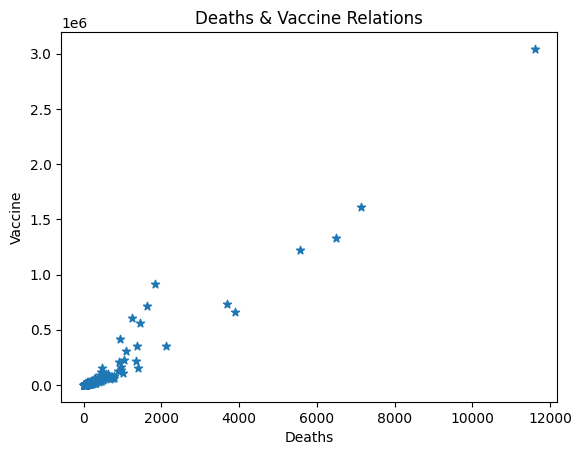

In [38]:
deaths_column = covid_df["Deaths"]
vaccine_column = covid_df["Vaccine"]

plt.scatter(deaths_column,vaccine_column, marker="*")

plt.xlabel("Deaths")
plt.ylabel("Vaccine")

# We can add a title too
plt.title("Deaths & Vaccine Relations")

Text(0.5, 0, 'Total Cases')

Text(0, 0.5, 'Vaccine')

Text(0.5, 1.0, 'Total Cases & Vaccine Relations')

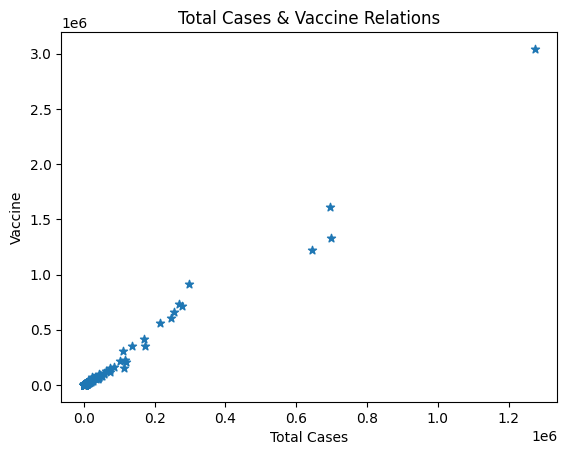

In [44]:
Total_Cases_column = covid_df["Total Cases"]
Vaccine_column = covid_df["Vaccine"]

plt.scatter(Total_Cases_column,Vaccine_column, marker="*")

plt.xlabel("Total Cases")
plt.ylabel("Vaccine")

# We can add a title too
plt.title("Total Cases & Vaccine Relations")

## Summary

I expected the vaccine will be negatively correlated to death or total cases. However, contrary to my expectation, the bivariate analysis found that it was highly positively correlated. To analyze this more visually, the two relationships were made into a scatter plot, but the results were the same. Both graphs go up to the right. However, both seem to have a lot of data concentrated on the side of zero. Therefore, the conclusion that vaccines have not helped reduce deaths or coronavirus cases in people living in Texas is completely wrong. Considering that this is a fairly recent result, I could come to a different conclusion. The results of this data analysis can be interpreted as more cases, more people die, and as a result, more people are vaccinated.